## What's the difference between greedy and dynamic programming ?

Both greedy methods and DP are used for solving optimization problems. They are different in the way they solve it. (Optimization problems are problems which require minimum or maximum result with some constraints)

1) A greedy algorithm is an algorithmic paradigm where a task is broken into pieces, and the immediate next piece is chosen such that it has the most obvious benefit. Thus steps are chosen based on local optimum, such that eventually global optimum is reached.Note that the global optimum is not guaranteed to be reached.
There are problems where the greedy approach is a good approximation and works well (Djkistra's algorithm with positive edges, fractional knapsack problem). There are also problems where the greedy approach will never work (Djkistra's algorithm with negative edges, etc)

https://stackoverflow.com/questions/6799172/negative-weights-using-dijkstras-algorithm/6799344#6799344

In greedy method, a decision (logic) is taken once, and same logic is repeated every step


In general ,greedy algorithms work faster than dynamic programming or other methods

2) Dynamic programming is just an optimization over recursion . Whenever we see recursion with multiple calls to the same inputs, we optimize using DP. The idea is storing the results of subproblems so we don't need to compute it again. This reduces time complexities from exponential to polynomial

For example, implementing the fibonacci number program recursively will be exponential, with DP and storing intermediate results, we can make it linear

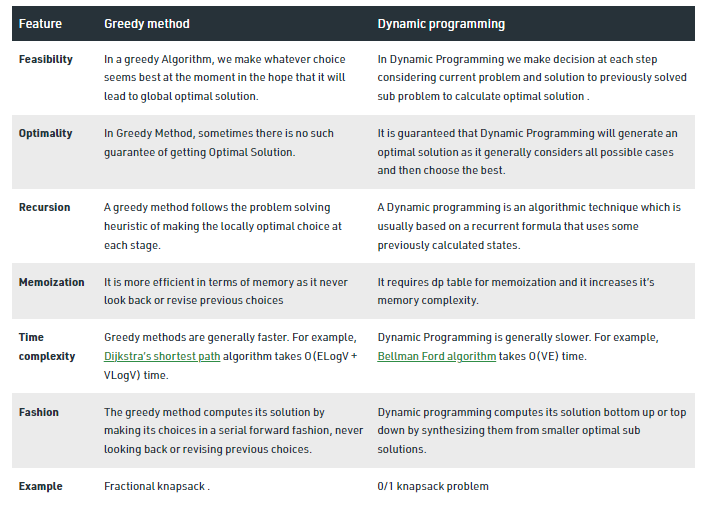

(https://www.geeksforgeeks.org/greedy-approach-vs-dynamic-programming/)

In DP, at every step, a different decision might be taken unlike a greedy algorithm



There are two ways to approach a DP problem -> Memoization and Tabulation
Memoization is top down and uses recursion, tabulation is bottom up and uses iteration
For example, if we want to compute the fibonacci(n) where n is an integer, memoization starts with n, goes to n-1, n-2 and so on (top down).
Whereas tabulation starts with fibonacci(0) and fibonacci(1) : bottoms up



## Example - compute the nth fibonacci series

This is a recursive problem

fib(0) = 0
fib(1) = 1
fib(n) = fib(n-1) + fib(n-2) if n>1

Let's say we want to compute fib(5). This is how breaking it into a tree works greedily


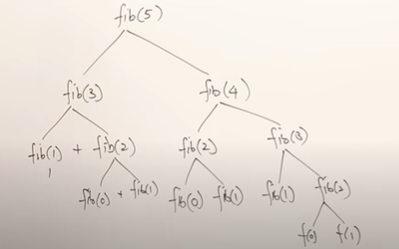



What is order complexity of naive approach ?
T(n) = T(n-1) + T(n-2)
can we approximately say
T(n) = 2T(n-1)
By solving this recursively

T(n) = O(2^n) -> exponential !!



Note that there is a lot of repeat operations if we do it naively -> fib(3) is called twice, fib(2) is called 3 times - so lot of repeat. If we use this idea and store result of fibonacci function, we can reduce this to a linear operation 




## Greedy implementation of Fibonacci

In [21]:
def fibo_greedy(n):
    if n<=1:
        return n
    else:
        output = fibo_greedy(n-1) + fibo_greedy(n-2)
        return output
        

In [24]:
%%time
a = fibo_greedy(15)
print(a)

610
Wall time: 8 ms


If we want to instead implement this as  DP, in memoization, start with the nth element, keep going down the tree, and the moment you find a value for the first time - say fib(2), store it , so that you don't  have to compute again fib(2) when you need it, and can instead just pick from cache

In tabulation, you start with fib(0), fib(1) and go ahead from there

## DP-memoization implementation of Fibonacci

In [41]:
def fibo_memoization(n):
    global_cache = [-1]*(n+1) ## n+1 elements as it includes 0
    global_cache[0] = 0
    if len(global_cache)>1:
        global_cache[1] = 1
    
    def fibo_subroutine(k):
        
        if global_cache[k] == -1:
            output = fibo_subroutine(k-1) + fibo_subroutine(k-2)
            global_cache[k] = output
            return output
        else:
            return global_cache[k]
            
    fibo_subroutine(n)
    return global_cache[n]
            
        

In [43]:
%%time
b = fibo_memoization(70)
print(b)

190392490709135
Wall time: 0 ns


## DP-tabulation implementation of Fibonacci

In [45]:
def fibo_tabulation(n):
    global_cache = [-1]*(n+1) ## n+1 elements as it includes 0
    global_cache[0] = 0
    if len(global_cache)>1:
        global_cache[1] = 1
    for i in range(2,n+1):
        global_cache[i] = global_cache[i-1] + global_cache[i-2]

    return global_cache[n]

In [46]:
%%time
d = fibo_tabulation(70)
print(d)

190392490709135
Wall time: 0 ns


## Example 2 : 0-1 knapsack problem

Unlike the fractional knapsack problem, where the greedy method gives the optimal solution, for the 0-1 knapsack problem, the greedy method does not work here

Why ? Because in the 0-1 knapsack problem, the solution for the subproblem Item 1, Item 2, item 3, Item 4 does not need to contain the solution of the subproblem item 1, item 2, item 3. In general, the optimal subset to the problem Sk+1 with k+1 items does not build upon the optimal solution to the problem Sk. 
Hence , it does not build greedily on the previous subproblem, unlike the fractional knapsack problem

Example : 

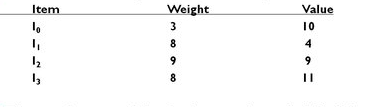


In the situation above, let's say the maximum weight the knapsack can hold is 20

If we choose the best solution from items I0,I1, I2 => The answer is I0,I1,I2 with a total profit of 23, and a total weight of 20

If we choose the best solution from items I0, I1, I2, I3 => The answer  is I0, I1, I3 which has a total profit of 25 and a total weight of 19

So the best solution for the subproblem I0, I1, I2, I3 does NOT contain the best solution for the subproblem I0, I1, I2


Now, we are clear the greedy solution doesn't work

What's the bruteforce soluition ? It is checking all combinations of items being present of absent

So if there are N items, the solution space is 2^N , where each item has two possibilities, included (1) or excluded (0)

This is too expensive computationally

## Solution for 0/1 knapsack using bruteforce

The maximum value that can be obtained with the n items with weight constraint W is the max of

1) Maximum value with n-1 items with weight constraint W (the case where nth item is not included)
2) Value of nth item + maximum value of n-1 items with weight constraint (W-wn) (where wn is the weight of the nth item, this is the case where the nth item is included)

If you think about this solution, similar to the fibonacci, you get a tree
Let's say W=2, n=3, the weights are [1,1,1] and the values are [10,20,30]

You want to evaluate B[3,2]  (value with 3 items, with weight 2)
B[3,2] = max(B[2,2],  B[1,2] + B[2,2-weight(nth item)])

Going down this recursion tree, creates a graph like this

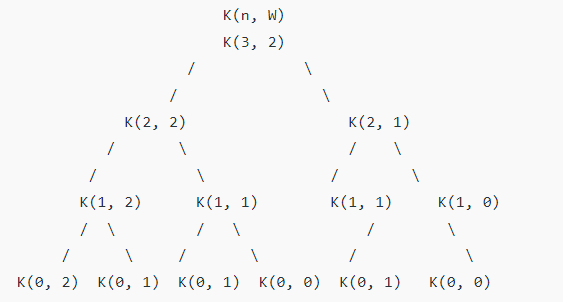

In this notation, K is used instead of B


Note that just like the fibonacci assumption, this brute force implementation has a lot of repeat work.(In the figure above K[1,1] is repeated twice)

In [6]:
def knap_sack_brute_force_0_1(W, n, wt_vec, val_vec):
    
    def knap_sack(weight_curr, n_curr, wt_vec, val_vec):
        if (n_curr==0) or (weight_curr==0):  ## base case
            return 0
        if wt_vec[n_curr-1]>W : ## if nth item alone has weight more than vacpacity of knapsack, nth item has to be excluded
            return knap_sack(weight_curr, n_curr-1, wt_vec, val_vec)
        
        val1 = knap_sack(weight_curr, n_curr-1, wt_vec, val_vec) ## nth item excluded
        val2 = knap_sack(weight_curr - wt_vec[n_curr-1], n_curr-1, wt_vec, val_vec) + val_vec[n_curr-1] ## nth item included
        
        output = max(val1, val2)
        return output
        
        
    output = knap_sack(W, n, wt_vec, val_vec)
    return output
    

In [7]:
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)


In [8]:
ans = knap_sack_brute_force_0_1(W, n, wt, val)

In [9]:
ans

220

## Dynamic programming solution

So what's the solution ? Dynamic programming -> where we cache the previos states, and at any given time, compare current situation with previous situation and build on it

With this paradigm, for every problem, we can build on subproblems
Similar to fibonacci series solution, you prevent computing the same subproblem again by caching intermediate solutions. We try to do this in a bottoms up (tabulation solution)

Let B[k,w] be a subproblem where we want maximum profit, if we choose k items, with weight w

Our goal is B[n,W], which is the maximum profit when we have n items, with weight W

Here rows are items, and colums are weight
In any cell B[k,w], we store the maximum profit obtained with k items with w weight

1) First, we create a grid of size (n+1)*(weight+1)*, set default value of all grid items to 0
2) You fill values in grid assuming you add 1 item at a time in increasing order or weight (sorting items first by increasing weight is commonly used for illustration , but is not strictly necessary)
3) The formula for filling values is B[k,w] = max(B[k-1,w],  B[k-1,w-w[k]]+P[k])

The time complexity and space complexity of this are O(N*W)

In [10]:
def knap_sack_dp_force_0_1(W, n, wt_vec, val_vec):
    
    B = [[0 for x in range(0, W+1)] for y in range(0, n+1)]
    
    for i in range(0,  n+1):
        for w in range(0, W+1):
            if (i==0) or (w==0):
                pass ## default case, should be 0
            elif wt_vec[i-1]<=w:
                B[i,w] = max(B[i-1,w], val_vec[i-1] + B[i-1, w-wt_vec[i-1]])
                
            else:
                B[i,w] = B[i-1,w]  ## this item excluded
    return B[i, w]

In [11]:
ans2 = knap_sack_brute_force_0_1(W, n, wt, val)

In [12]:
ans2

220

## Climbing stairs


https://leetcode.com/problems/climbing-stairs/

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

In [7]:
class Solution:
    def climbStairs(self, n: int) -> int:
        cache_list = [-1]*(n+1)
        cache_list[0] = 0
        cache_list[1] = 1
        if n>1:
            cache_list[2] = 2
        
        def climb_stairs_subroutine(n):
            if n<=2:
                return cache_list[n]
            else:
                if cache_list[n] != -1:
                    return cache_list[n]
                else:
                    cache_list[n] = (climb_stairs_subroutine(n-1) ) + (climb_stairs_subroutine(n-2))
                    return cache_list[n]
        output = climb_stairs_subroutine(n)
        return output
                
        

In [9]:
a = Solution()
a.climbStairs(4)

5

## Maximum subarray

https://leetcode.com/problems/maximum-subarray/
Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.

In [19]:
from typing import List
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        n = len(nums)
        max_sum = None
        running_sum = None
        for num in nums:
            if max_sum is None: ## starting case
                max_sum = num
                running_sum = num
            else:
                if running_sum<0:
                    running_sum = 0
                running_sum = running_sum + num
                max_sum = max(max_sum, running_sum)
        return max_sum
                

In [20]:
a = Solution()
nums = [5,4,-1,7,8]
a.maxSubArray(nums)

23

## Maximum product subarray

https://leetcode.com/problems/maximum-product-subarray/

In [32]:
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        n = len(nums)
        result = max(nums)
        currMax, currMin = 1,1

        
        for cnt, val in enumerate(nums):
            if val==0:
                currMax = 1
                currMin = 1
            currMax_new = max(val, max(currMax*val, currMin*val))
            currMin_new = min(val, min(currMax*val, currMin*val))
            currMax = currMax_new
            currMin = currMin_new
            result = max(result, currMax)
        return result
            
            

In [33]:
a = Solution()

In [34]:
nums = [-4,-3,-2]

In [35]:
a.maxProduct(nums)

0 -4 -4 -4
1 -3 12 -3
2 -2 6 -24


12

https://leetcode.com/problems/house-robber/

In [3]:
from typing import List
class Solution:
    def rob(self, nums: List[int]) -> int:
        n = len(nums)
        maximum_amount_array = [-1]*(n)
        maximum_amount_array[0] = nums[0]
        if n==1:
            return maximum_amount_array[0]
        maximum_amount_array[1] = max(nums[0], nums[1])
        
        for i in range(0, n):
            if maximum_amount_array[i] == -1:
                maximum_amount_array[i] = max(maximum_amount_array[i-1], maximum_amount_array[i-2] + nums[i])
        return maximum_amount_array[n-1]

In [4]:
a = Solution()

In [6]:
nums = [1,2,3,1]
a.rob(nums)

4

## Perfect squares

In [7]:
import math

In [8]:
math.sqrt(12)

3.4641016151377544

https://leetcode.com/problems/perfect-squares/

In [1]:
import math
import numpy as np
class Solution:
    def numSquares(self, n: int) -> int:
        count_array = [-1]*(n+1)
        
        def is_perfect_square(x):
            sqrt = math.sqrt(x)
            if int(sqrt)==sqrt:
                return True
            else:
                return False
            
        def all_numbers_less_eq_x_perfect_square(x):
            outlist = []
            
            for i in range(1,x+1):
                if i*i > x:
                    break
                else:
                    outlist.append(i*i)
                

            return outlist
                
            
        
        def count(x):
            if count_array[x] == (-1):

                if is_perfect_square(x):
                    count_array[x] = 1
                    return 1
                else:
                    all_perfect_squares = all_perfect_square_numbers[all_perfect_square_numbers <= x]
                    for y in all_perfect_squares:
                        count_array[y] = 1
                        temp = count(x-y)
                        if count_array[x]==-1:
                            count_array[x] = temp + 1
                        else:
                            if (temp + 1) < count_array[x]:
                                count_array[x] = temp + 1
                    return count_array[x]
            else:
                return count_array[x]
        all_perfect_square_numbers = np.array(all_numbers_less_eq_x_perfect_square(n))
        print(all_perfect_square_numbers)
   
        count(n)
        return count_array[n]

                
                
    
        
            
        

In [9]:
## Alternative approach - tabulation (bottom up) instead of memoization (top down) which was previous implementation

In [7]:
class Solution:
    def numSquares(self, n: int) -> int:
        output = [n]*(n+1)
        output[0] = 0
        
        for target in range(1, n+1):
            for s in range(1, target + 1):
                square = s*s
                if target<square:
                    break
                temp = 1 + output[target-square]
                if temp < output[target]:
                    output[target] = temp
        return output[n]



In [8]:
a = Solution()

In [11]:
a.numSquares(4)

[0, 1, 2, 3, 1]


1

## Coin Change

https://leetcode.com/problems/coin-change/

In [25]:
from typing import List
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        
        if amount==0:
            return 0
        
        n = len(coins)
        output = [-1]*(amount+1)
        output[0] = 0
        
        coins.sort()
        
        for i in range(1, amount+1):
            
            for coin in coins:
                if coin > i:
                    continue
                if output[i-coin] != -1:
                    if output[i]==-1:
                        output[i] = output[i-coin] + 1
                    else:
                        output[i] = min(output[i], output[i-coin] + 1)
        return output[amount]
            
        
        
        

In [26]:
a = Solution()

In [30]:
coins = [1]
amount = 0

In [31]:
a.coinChange(coins, amount)

0

## Best Time to Buy and sell stock with cooldown  

https://leetcode.com/problems/best-time-to-buy-and-sell-stock-with-cooldown/

In [15]:
from typing import List
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)
        dp = {}
        ## for the cache index , have a tuple (i, 0/1) where i is index, and 0 if you bought, 1 if you sold
        
        def dfs(i, buying):
            if i>=(n):
                return 0
            if (i, buying) in dp.keys():
                return df[(i, buying)]
            if buying:
                buy = dfs(i + 1, not buying)- prices[i]
                cooldown = dfs(i + 1, buying)
                dp[(i, buying)] = max(buy, cooldown)
            else:
                sell = dfs(i+2, not buying) + prices[i]
                cooldown = dfs(i + 1, buying)
                dp[(i, buying)] = max(sell, cooldown)
            return df[(i, buying)]
        dfs(0, True)
                
                
        


In [16]:
a = Solution()

In [13]:
prices = [1,2,3,0,2]

In [17]:
a.maxProfit(prices)

4

1) https://www.geeksforgeeks.org/greedy-approach-vs-dynamic-programming/
2) https://www.youtube.com/watch?v=5dRGRueKU3M
3) https://www.freecodecamp.org/news/when-to-use-greedy-algorithms/
4) https://www.tutorialspoint.com/design_and_analysis_of_algorithms/design_and_analysis_of_algorithms_01_knapsack.htm#:~:text=0%2D1%20Knapsack%20cannot%20be,may%20give%20an%20optimal%20solution.
5) https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/

In [127]:
np.array([1,2,4])<5

array([ True,  True,  True])